# Introduction to Deep Learning
In machine learning we give the features to the model as input to train on. In deep learning we alow the machines to learn the features on there own from image, voice, text and time series. Then train the model from the extracted features. Therefore deep learning is automatic feature extraction plus machine learning, the machine learning part of it can be any of the three supervised, unsupervised or reenforcement learning. Pure deep learning is not based on models like support vector machine, regression, clasification etc. It is based and works on artificial neural networks.

Since the features are automatically generated and used by the machine, dimentionality reduction is not needed for deep learning. Unlike humans machines get more clarity on data as dimensions increase, as it can seperate out data with higher dimensions(features) easily. Where as humans cannot visualize beyond 3 dimensions. Hence in machine learning where features are not auto extracted, we do dimentionality reduction. 

Applications of deep learning can be boardly divided into 2 categories computer vision based(images and videos) and natural language processing based(text, speach and time series). For Images automatic feature extraction happens through convolution. For speach this happens through recurrent neural networks. Voice, text and time series are sequence based data, they are similar. Same models can be used for all three of them.

## Artificial Neural Network (ANN)
ANN's are made up of artificial neurons. An artificial neuron (AN) is a mathematical model of a biological neuron, it is also called a node. Multiple inputs come into AN, a non-linear function is applied to thier sumation which gives the output. The non-linear function applied is called the activation function. Non-linear since machine can easily seperate catogaries using non-linear lines. Each input value is given a weight and the node is given a bias(also called correction factor). Therefore the summation of the weighted inputs and bias is the input to the node. Input x = w1x1 + w2x2 + .... + wnxn + b, also called affine equation. Here the w's and b are learned and are called parameters. Typical activation functions are 
* Sigmoid - input has to go through a expoential 1/(1+$e^{-x}$, output is in between 0 to 1 
* Tan hyperbolic(tanh) - again exponential $e^{x} - e^{-x}$)/($e^{x} + e^{-x}$, output is in between -1 to 1
* Rectified linear unit(relu) - output y=x if x > 0 else y = 0 
* Linear/Identity - output is same a input, it does nothing 
* Binary - if x < 0 output is 0 else 1  
* Softmax - Used for ouput layer, sum of all the outputs of all nuerons in output layer is 1, hence giving us the probabilities of predictions for a categorical problem - $e^{-x}/\sum_{i=1}^{N}(e^{-x})$

We have to use the same activation function for all the nodes expect for the output layer.

ANN consists of many multi layered neurons. Each node from the previous layer has a weighed input to every node in the next layer. Thus also called fully connected nueral network.The first layer is the input layer, the last one is the output layer and in between are the hidden layers(black box, we don't know what is happening in them). The number of neurons in the input layer depends on data, for example for a image this is number of pixels multiplied by depth of the image. The number of neurons in the output layer depends on what the model should output, for example for a multi class clasification the number of output layer nodes will be the number of classes. The number of hidden layers, number of neurons in a hiden layer and the activation functions depend on the neural network architecture, type of neural network chosen etc and are called hyper parameters that have to be tuned.

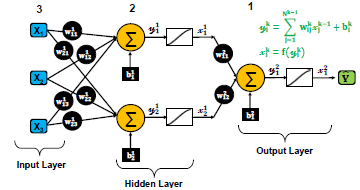

Universal approximation theorem states that any complex task can be learned by a ANN, provided we give sufficiently large number of neurons and layers.

## Convolutional Neural Network (CNN)
CNN is convolution plus ANN, convolution is used for feature extration from images and videos. The extracted features are then inputs to ANN. To start with convert the image into pixel values matrix(L X W X D), each pixel is an input to one input node. Therefore we will need L x W x D nodes in the input layer. But for images if we use directly ANN's, ANN does not know which pixels are more important, region of interest (ROI). For CNN's in convolution we apply image filters to highlight the more important regions of pixels. First apply the filter matrix on the image pixel matrix by sliding the filter on the image as shown below.

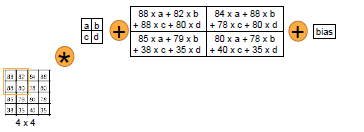

The output of this convolution is a feature map(automatic feature extraction), filtering out the important parts of the image. This is repeated using multiple filters as shown below.

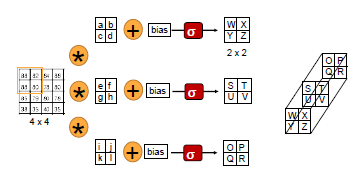

And then the feature maps can be stacked as shown above. The filters and bias are learned. This does not stop here we can add more convolutional layers like this. This results in reduced image sizes, highlight the more important parts of the image. Then the output of CNN is feed into an ANN as shown below.

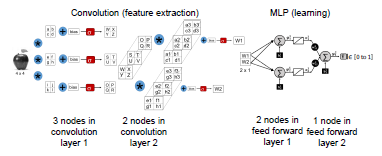

## Training a Deep Neural Network (DNN)
All machine leaning(ML), deep learning(DL) are optimization plus generalization. Optimization is where we try to fit the curve to pass through all data points. ML on the other hand gives a generic curve, which does not over fit the data and works for unseen data.

All weights from one layer to the next can be represented as a matrix. All bias in layer can be represented as a vector.
Therefore the equation for a layer is a1 = W1x + b1. where a1 is the output vector of the current layer, W1 is the matrix of weights from the previous layer to the current layer, x is the input vector to the current layer i.e output vector of the previous layer and b1 is a bias vector of the current layer. By doing this for each layer and substituting we can get a output as a function of input, weights and biases. $\hat{y}=f(x)$

In supervised learning, we have the input x and output lable y. DNN has to learn a function $\hat{y}=f(x)$ such that $\hat{y}=y$. This learning includes everything - number of layers, number of nodes, weights, bias etc. This learning should happen over large number of data points(inputs).

Steps to train a deep neural network
* Define starting values for number of layers and neurons (hyper parameters) and create a neural network
* Randomly initialize weights and biases
* Pass one input through the network and get the predicted output, this is called forward propogation
* Calculate the error from actual labled output - predicted output, this is called as prediction error
* Repeat the above 2 steps for all the data points and calculate the average prediction error
* Adjust weights and biases to minimize prediction error in the next forward propogation

For the prediction error, a loss function or cost function(L) is defined to quantify the error for all the data points. For regression this can be mean squared error $ 1\over N$ $\sum_{i=1}^{N} (y_i - y_i^p) $. For clasification it is cross entropy loss error, since output is a probabilistic value for each class(k classes) $ 1\over N$ $\sum_{i=1}^{N} \sum_{j=1}^{k}ylogy^p $. We use squared errors to penalise more for higher errors.

The output layer activation function for categorical data is softmax or sigmoid. For multi class we use softmax since it gives the probabilities such that the sum of all class probabilities is equal to 1. For single class we use sigmoid which gives a value between 0 to 1. For the hidden layers we normally use relu or tan h, which are proven to work well.

Adjusting weights to minimise the loss function: For simplicity assume only 2 parameters w1 and w2. we start with a random point (w1, w2) and try to go to a local minima. we do not try to find the global minima. For this w1 and w2 are modified for each iteration such that the loss decreases. The direction of weights for each step is given by the gradient(From geometry/caculus it is partial derivative) and length of each step is given by $\alpha$ (learning rate, hyper parameter). Learning rate normally is less than 1. A very high learning rate might never converge to the minimma and a very low learning rate will take too long to converge, Hence we have to choose an optimal learning rate. This is called gradient desent algorithm.

w1(new) = w1(old) - $\alpha \partial L\over \partial w1$ (partial derivative of loss function w.r.t w1)

w2(new) = w2(old) - $\alpha \partial L\over \partial w2$ (partial derivative of loss function w.r.t w2)

Parameters are updated iteratively as shown above until the loss function is minimised(convergence). At convergence the gradient i.e the partial derivative is 0.This algorithm can be extended to any number of parameters(weights and biases). Now the challenge is to find the partial derivatives which is done by back propagation as shown below for a very simple network.

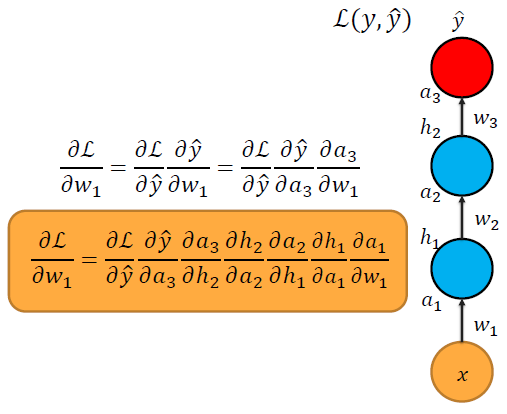

From the network we can plug all the values and get the value for the partial derivative of loss function w.r.t w1. For example $\partial a1\over \partial w1$ is x, $\partial h1\over \partial a1$ is partial derivative of activation function, $\partial a2\over \partial h1$ is w2 etc. Hence the name back propagation, since we are substituting derivatives in the backword direction. For the above equation we need a partial devivative of the activation function too, hence the need for it to be a non linear function. This has to be done for all the weights.

There are 3 variants of the gradient descent which improve the speed and help it to not get stuck in the local minima
* Batch Gradient Descent : This is normal GD, where all the data points (N) are considered as one batch and used for each propagation, can be get stuck in local minima.
* Stochastic Gradient Descent : Here we just use one data point randomly selected from the entire data set and use it for each propagation, this is very slow.
* Mini-Batch Gradient Descent : Here we take a subset of the data points (n, where n << N) and use them for each propagation. This is the most prefered one, as it balances the first 2 types.

If we use all the data points then it is called a epoch, else if we use only a subset(batch) then it is called a iteration. if N=1000 and n=10 then we need 100 iterations to complete a epoch. if a Mini-Batch Gradient Descent does 1000 epochs with batch size of 10 and data size of 1000, then it has to do 1000 * (1000/10) propagations.

Batch Normalization: Normalization is a technique were we get the values of all data points between 0 to 1, to eliminate issues with numerical calculations. Batch normalization is where we add a normalization layer for output of each layer. This is normally done with the formula x = (x - m)/$\sigma$ - x is a single value, m is the mean of the entire batch and $\sigma$ is the standard deviation of the entire batch (called standard scalar). We cannot directly use 0 to 1 nomalization(min-max scalar (x-xmin)/(xmax-xmin)), since it is not diffentiable. Many times normalization is achieved by the activation function itself, no extra normalization layer is needed.

Regularization: Is is technique were in you train the model in such a way that it is generalized for unseen data. For this the data is split into 3 different parts train, validation and test data. Train data is used for training, validation data is used to generalize the model and test data is used to measure the performance of the data. If we focus only on the reducing training data error, then beyound some point the curve will over fit the training data and error starts increasing on the validation data(unseen data). The point at which the validation data error is minimum is where you want to stop tuning and thus generalizing the model. To mathematically find where to stop, we add a panalty to the loss function $L(\theta) + \lambda\Omega(\theta)$, the penalty gets added when we cross the minimum validation data error. Value of $\lambda$, the strength of the penalty is again a hyper parameter.

There are 4 different ways to implement regularization
* l1 and l2 regularization : For l1 the penalty function is based on the number of weights $L(\theta) = L(\theta) + \lambda||W||_1$, meaning that if the number of weights are too many then the model is over fitting (used in ML). For l2 the penalty function is based on the magnitude of the weights(sum of squared values) $L(\theta) = L(\theta) + \lambda/2||W||_2$, meaning the weight values become very high when the model over fits (used in ML and DL).
* Early stopping : We track the validation set prediction error and stop at its lowest
* Ensemble Methods : We will train different models for the same task using different features, hyper parameters etc. Outputs all all the models are combined to reduce the error. Computationally very intensive hence not prefered.
* Dropout : Some nuerons are randomly dropped during training by removing the connections. This is done per iteration, for the next iteration a different set of neurons may be dropped. This works because it gives the effect of shuffling the nodes between the groups and thus learning to regularise the task better. Effectively learning is happening on a different neural network in each iteration.

For deep leaning l2, early stopping and dropout are combined and used to get the best  regularization.

## Deep Learning Project Life Cycle
0. Problem Statement : Understand the problem, Have a north star metrics which defines success and acceptence critiria, build a rough sketch of the solution.
1. Data Collection : Frame the data requirements (for examples the kind of images needed), define the quality and quantity of the data.
2. Exploratory Data Analysis : Data cleaning, data quality check, like image height, width, depth etc, feature enggineering (addtional features).
3. Data Selection : Split the data into traning, validation and test data. Best way to split the data is to use stratified sampling. Use image generators to read data(images) as and when needed as the data is very huge, to solve space and computational problems.
4. Pre Processing : Resize the data, balancing the images, changing image channels, rotating/flipping/zooming etc, image agumentation.
5. Train the model : Always make a base line model (model with the default hyper paramters), then build on top of this by tunning the hyper paramters. This way we will have a base metric to compare with. Then record your metrics and save the model.
6. Validation : Iterative hyper parameter tuning based on validation results.
7. Testing : Test your model on the test data and publish the results.
8. Inferencing : Delpoy the model with a interface so that it can be used by applications. The interface can be from a simple function with image pre processing to a large distributed scalable system. Look at model errors in production, helps in future improvements.